<a href="https://colab.research.google.com/github/subhayuroy/DogBreed_Analysis/blob/main/DogBreed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.


In [1]:
!unzip archive.zip

Archive:  archive.zip
  inflating: __init__.py             
  inflating: decode_predictions.py   
  inflating: dl/exercise_1.py        
  inflating: dl/exercise_2.py        
  inflating: gan_utils.py            
  inflating: gans/__init__.py        
  inflating: gans/discriminators.py  
  inflating: gans/gan_utils.py       
  inflating: gans/generators.py      
  inflating: utils/__init__.py       
  inflating: utils/decode_predictions.py  
  inflating: utils/dl/exercise_1.py  
  inflating: utils/dl/exercise_2.py  
  inflating: utils/gan_utils.py      
  inflating: utils/gans/__init__.py  
  inflating: utils/gans/discriminators.py  
  inflating: utils/gans/gan_utils.py  
  inflating: utils/gans/generators.py  


In [16]:
!unzip ResNet-50.zip

Archive:  ResNet-50.zip
  inflating: imagenet_class_index.json  
  inflating: resnet50_weights_tf_dim_ordering_tf_kernels.h5  
  inflating: resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5  


In [ ]:
!unzip dog-breed-identification.zip

In [3]:
from IPython.display import Image, display
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from os.path import join

In [ ]:
def read_and_prep_images(img_paths, img_height=image_size, img_width=image_size):
    imgs = [load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths]
    img_array = np.array([img_to_array(img) for img in imgs])
    output = preprocess_input(img_array)
    return(output)

In [ ]:
import cv2
import os

def load_images_from_folder(folder):
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        print(type(img))
        if img is not None:
            return img

In [ ]:
from os.path import join

image_dir = '/content/train'
img_paths = [join(image_dir, filename) for filename in ['0c8fe33bd89646b678f6b2891df8a1c6.jpg',
                                                        '0c3b282ecbed1ca9eb17de4cb1b6e326.jpg',
                                                        '04fb4d719e9fe2b6ffe32d9ae7be8a22.jpg',
                                                        '0e79be614f12deb4f7cae18614b7391b.jpg']]

# import glob
# img_paths = glob.glob("/content/train/*.jpg")

# import os
# relevant_path = "/content/train"
# included_extensions = ['jpg']
# file_names = [fn for fn in os.listdir(relevant_path)
#               if any(fn.endswith(ext) for ext in included_extensions)]

In [ ]:
from tensorflow.keras.applications import ResNet50

my_model = ResNet50(weights='resnet50_weights_tf_dim_ordering_tf_kernels.h5')
test_data = read_and_prep_images(img_paths)
preds = my_model.predict(test_data)

#Transfer Learning

**Create Model with Pre-Trained Weights File. Make Predictions**

In [17]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D

In [18]:
num_classes = 2
resnet_weights_path = 'resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [19]:
breed_model = Sequential()
breed_model.add(ResNet50(include_top=False, pooling='avg', weights=resnet_weights_path))
breed_model.add(Dense(num_classes, activation='softmax'))

# Indicate whether the first layer should be trained/changed or not.
breed_model.layers[0].trainable = False

In [20]:
def prep_data(raw):
    y = raw[:, 0]
    out_y = keras.utils.to_categorical(y, num_classes)
    
    x = raw[:,1:]
    num_images = raw.shape[0]
    out_x = x.reshape(num_images, img_rows, img_cols, 1)
    out_x = out_x / 255
    return out_x, out_y

**Indicate whether the first layer should be trained/changed or not.**

In [21]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = 224
data_generator = ImageDataGenerator(preprocess_input)

***Compiling MODEL***

In [22]:
breed_model.compile(optimizer='sgd', 
                     loss='categorical_crossentropy', 
                     metrics=['accuracy'])

***Fitting the Model***

In [23]:
train_generator = data_generator.flow_from_directory(
                                        directory='/content/train',
                                        target_size=(image_size, image_size),
                                        batch_size=10,
                                        class_mode='categorical')

Found 220 images belonging to 2 classes.


In [24]:
validation_generator = data_generator.flow_from_directory(
                                        directory='/content/val',
                                        target_size=(image_size, image_size),
                                        class_mode='categorical')

Found 217 images belonging to 2 classes.


In [25]:
fit_stats = breed_model.fit_generator(train_generator,
                                       steps_per_epoch=22,
                                       epochs=1,
                                       validation_data=validation_generator,
                                       validation_steps=1)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


22/22 [==============================] - 38s 2s/step - loss: 0.3979 - accuracy: 0.8409 - val_loss: 0.2004 - val_accuracy: 0.9375


In [26]:
breed_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 4098      
Total params: 23,591,810
Trainable params: 4,098
Non-trainable params: 23,587,712
_________________________________________________________________


#Data Augmentation

###New Model

In [27]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D

num_classes = 2
resnet_weights_path = 'resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [28]:
new_model = Sequential()
new_model.add(ResNet50(include_top=False, pooling='avg', weights=resnet_weights_path))
new_model.add(Dense(num_classes, activation='softmax'))

**Indicate whether the first layer should be trained/changed or not.**

In [29]:
new_model.layers[0].trainable = False

In [30]:
new_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = 224

# Specify the values for all arguments to data_generator_with_aug.
data_generator_with_aug = ImageDataGenerator(preprocessing_function=preprocess_input,
                                              horizontal_flip = True,
                                              width_shift_range = 0.1,
                                              height_shift_range = 0.1)
            
data_generator_no_aug = ImageDataGenerator(preprocessing_function=preprocess_input)

In [32]:
# Specify which type of ImageDataGenerator above is to load in training data
train_generator = data_generator_with_aug.flow_from_directory(
        directory = '/content/train',
        target_size=(image_size, image_size),
        batch_size=12,
        class_mode='categorical')

# Specify which type of ImageDataGenerator above is to load in validation data
validation_generator = data_generator_no_aug.flow_from_directory(
        directory = '/content/val',
        target_size=(image_size, image_size),
        class_mode='categorical')

TRAINING_SIZE = 220
VALIDATION_SIZE = 217
steps_per_epoch = lambda x: int(math.ceil(1. * x / TRAINING_SIZE))
val_steps = lambda x: int(math.ceil(1. * x / VALIDATION_SIZE))


new_model.fit_generator(
        train_generator, 
        epochs = 3,
        steps_per_epoch=19,
        validation_data=validation_generator)

Found 220 images belonging to 2 classes.
Found 217 images belonging to 2 classes.
Epoch 1/3
19/19 [==============================] - 63s 3s/step - loss: 0.4127 - accuracy: 0.8182 - val_loss: 0.1531 - val_accuracy: 0.9355
Epoch 2/3
19/19 [==============================] - 61s 3s/step - loss: 0.1145 - accuracy: 0.9727 - val_loss: 0.1107 - val_accuracy: 0.9493
Epoch 3/3
19/19 [==============================] - 64s 3s/step - loss: 0.0732 - accuracy: 0.9909 - val_loss: 0.1151 - val_accuracy: 0.9585


In [33]:
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 4098      
Total params: 23,591,810
Trainable params: 4,098
Non-trainable params: 23,587,712
_________________________________________________________________


**Visualize Predictions**

In [ ]:
import json

def decode_predictions(preds, top=5, class_list_path=None):
  """Decodes the prediction of an ImageNet model.
  Arguments:
      preds: Numpy tensor encoding a batch of predictions.
      top: integer, how many top-guesses to return.
      class_list_path: Path to the canonical imagenet_class_index.json file
  Returns:
      A list of lists of top class prediction tuples
      `(class_name, class_description, score)`.
      One list of tuples per sample in batch input.
  Raises:
      ValueError: in case of invalid shape of the `pred` array
          (must be 2D).
  """
  if len(preds.shape) != 2 or preds.shape[1] != 1000:
    raise ValueError('`decode_predictions` expects '
                     'a batch of predictions '
                     '(i.e. a 2D array of shape (samples, 1000)). '
                     'Found array with shape: ' + str(preds.shape))
  CLASS_INDEX = json.load(open(class_list_path))
  results = []
  for pred in preds:
    top_indices = pred.argsort()[-top:][::-1]
    result = [tuple(CLASS_INDEX[str(i)]) + (pred[i],) for i in top_indices]
    result.sort(key=lambda x: x[2], reverse=True)
    results.append(result)
  return results

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import time


def visualize_training_generator(train_step_num, start_time, plottables, undo_normalization=False):
    """Visualize generator outputs during training.

    Args:
        train_step_num: The training step number. A python integer.
        start_time: Time when training started. The output of `time.time()`. A
            python float.
        plottables: Data to plot. Numpy array or list of numpy arrays,
            usually from an evaluated TensorFlow tensor.
    """
    print('Training step: %i' % train_step_num)
    time_since_start = (time.time() - start_time) / 60.0
    print('Time since start: %f m' % time_since_start)
    print('Steps per min: %f' % (train_step_num / time_since_start))
    if type(plottables) == list:
        plottables = np.dstack(plottables)
    plottables = np.squeeze(plottables)
    if undo_normalization:
        plottables = ((plottables * 128) + 128).astype(np.uint8)

    plt.figure(figsize=(15,15))
    plt.axis('off')
    plt.imshow(plottables, cmap='gray')
    plt.show()

def dataset_to_stream(inp, batch_size):
    with tf.device('/cpu:0'):
        batched = inp.apply(tf.contrib.data.batch_and_drop_remainder(batch_size))
        data_feeder = batched.repeat().make_one_shot_iterator().get_next()
    return data_feeder

def parse_img_dir(img_dir, output_height, output_width, batch_size, max_epochs):
    '''Original images are 256 x 512 x 3. Left half is original image, right is semantic seg'''

    def parse_img(fname):
        img_strings = tf.read_file(fname)
        imgs_decoded = tf.image.decode_jpeg(img_strings, channels=3)
        output = tf.image.resize_images(imgs_decoded, [output_height, 2 * output_width])
        output = (output - 128) / 128
        return output

    file_list = os.listdir(img_dir)
    img_paths = [os.path.join(img_dir, fname) for fname in file_list]
    img_paths_dataset = tf.data.Dataset.from_tensor_slices(img_paths)
    img_dataset = img_paths_dataset.map(parse_img)
    left_imgs = img_dataset.map(lambda x: x[:, :output_width, :])
    right_imgs = img_dataset.map(lambda x: x[:, output_width:, :])
    left_provider = dataset_to_stream(left_imgs, batch_size)
    right_provider = dataset_to_stream(right_imgs, batch_size)
    return left_provider, right_provider

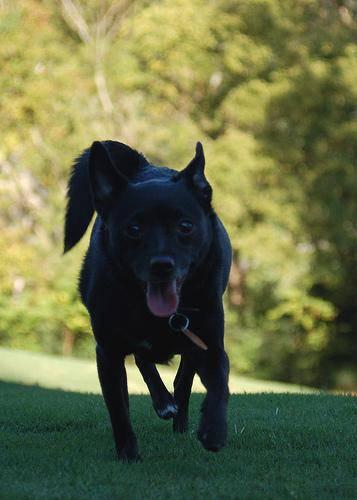

Staffordshire_bullterrier





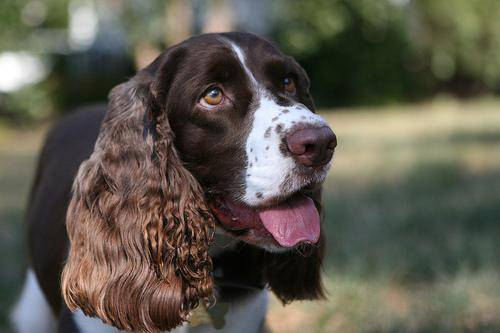

English_springer





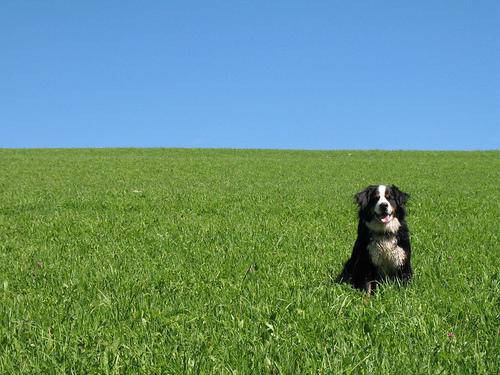

Bernese_mountain_dog





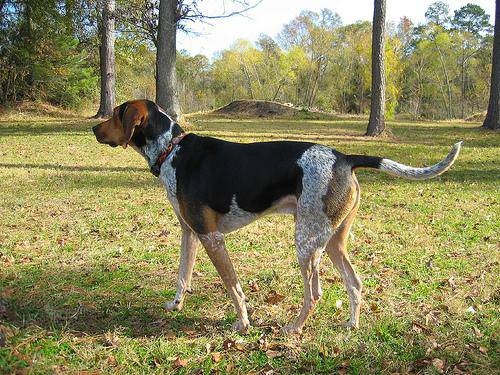

bluetick





In [ ]:
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from IPython.display import Image, display

most_likely_labels = decode_predictions(preds, top=3)

for i, img_path in enumerate(img_paths):
    display(Image(img_path))
    print(most_likely_labels[i][0][1])
    print("\n\n")